# Modèle de recommandations de films 

## 1. Imports

### 1.1 Libraries

In [45]:
# builtin
import os, time, sys, random

# data
import pandas as pd
import numpy as np
import requests
import math

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# other
import warnings
warnings.filterwarnings("ignore")

### 1.2 Download and options

In [47]:
sns.set()

### 1.3 Loading data

In [48]:
# Env Perso
#df = pd.read_csv(r"C:\Users\derou\OneDrive\Bureau\DATA\PORTFOLIO\Recommandation de films\df_movies.csv")

# Env Vinci
df = pd.read_csv(r"C:\Users\melvin.derouk\Desktop\Data formation\Movies-Recommandations-main\df_movies.csv")

## 2. First tour

### 2.1 Display

In [49]:
df.drop(columns= "Unnamed: 0", inplace=True)

In [50]:
df.head(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note
0,507089,Five Nights at Freddy's,"Horreur, Mystère",2023-10-25,Un groupe d'animaux animatroniques interprète ...,8.4
1,951491,Saw X,"Horreur, Thriller",2023-09-26,"Dans l'espoir d'une guérison miraculeuse, John...",7.4
2,939335,Muzzle,"Action, Crime, Drame, Thriller",2023-09-29,"Jake Rosser, officier de police dans l'équipe ...",6.3
3,354912,Coco,"Familial, Animation, Fantastique, Musique, Com...",2017-10-27,"Depuis déjà plusieurs générations, la musique ...",8.2
4,968051,La Nonne : La Malédiction de Sainte-Lucie,"Horreur, Mystère, Thriller",2023-09-06,"En France, en 1956, un prêtre est assassiné da...",7.0


In [51]:
df.tail(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note
9995,88005,Jusqu'à ce que la fin du monde nous sépare,"Comédie, Drame, Romance, Aventure",2012-06-22,Que feriez-vous si la fin du monde arrivait da...,6.6
9996,586048,82년생 김지영,Drame,2019-10-23,Kim Ji‑young est une épouse aimante et une mèr...,7.4
9997,554590,Tod@s Caen,Comédie,2019-08-30,Adam et Mia sont deux stratèges qui veulent en...,7.8
9998,252164,Pressure,"Drame, Thriller",2015-06-04,Quatre plongeurs sont envoyés au fond de l'océ...,5.7
9999,553608,DJ Cendrillon,"Romance, Comédie",2019-02-28,"Cintia est une princesse moderne, elle est con...",6.5


In [52]:
df.sample(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note
3371,957,La Folle Histoire de l’espace,"Comédie, Science-Fiction",1987-06-24,"Aidé du sombre Casque Noir, le Président Skroo...",6.8
7843,339405,Christine,Drame,2016-10-14,"Inspiré d’une histoire vraie - 1974, Sarasota,...",6.8
5617,11979,La Reine des damnés,"Drame, Fantastique, Horreur",2002-02-10,"En quête de popularité, le vampire Lestat s'in...",6.1
5761,4944,Burn After Reading,"Comédie, Drame",2008-09-05,Osborne Cox est un analyste à la CIA en diffic...,6.6
5428,60672,Les Rivières pourpres 2 : Les Anges de l'apoca...,"Action, Thriller, Crime",2004-02-18,"Pour le commissaire Pierre Niemans, l'homme re...",6.1
2872,1105014,Ripper's Revenge,Horreur,2023-04-03,NaN,6.5
682,68721,Iron Man 3,"Action, Aventure, Science-Fiction",2013-04-18,"Tony Stark, l’industriel flamboyant qui est au...",6.9
7525,504827,Bob's Burgers : Le Film,"Animation, Aventure, Comédie, Musique",2022-05-26,Lorsqu'une rupture de canalisation créé un éno...,7.0
2640,9056,Police Story,"Action, Crime, Thriller",1985-12-14,L'inspecteur Chan se voit confier la protectio...,7.5
8313,928745,Procura-se,"Comédie, Romance",2022-11-25,NaN,7.2


### 2.2 Structure

In [53]:
df.shape

(10000, 6)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10000 non-null  int64  
 1   Titre           10000 non-null  object 
 2   Genre           9952 non-null   object 
 3   Date de sortie  9986 non-null   object 
 4   Synopsis        9053 non-null   object 
 5   Note            10000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [55]:
df.nunique()

ID                9903
Titre             9674
Genre             2247
Date de sortie    5925
Synopsis          8963
Note                72
dtype: int64

### 2.3 NaN & duplicated

In [56]:
#NaN

df.isna().sum()

ID                  0
Titre               0
Genre              48
Date de sortie     14
Synopsis          947
Note                0
dtype: int64

In [57]:
df.isna().mean().sort_values()

ID                0.0000
Titre             0.0000
Note              0.0000
Date de sortie    0.0014
Genre             0.0048
Synopsis          0.0947
dtype: float64

<AxesSubplot:>

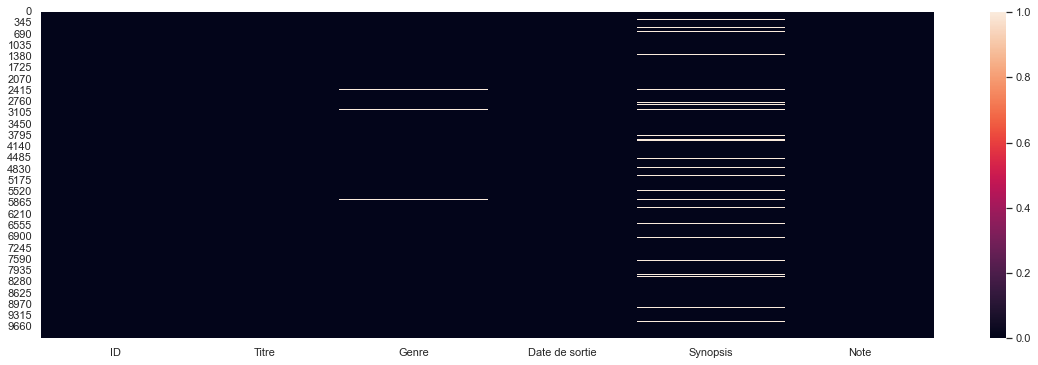

In [58]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isna())

In [59]:
# Duplicated rows

df.duplicated().sum()

97

In [60]:
# doublons par colonne

for col in df.columns:
    n = df.duplicated(subset=col).sum()
    print(f"column : {col} -> duplicated : {n}")

column : ID -> duplicated : 97
column : Titre -> duplicated : 326
column : Genre -> duplicated : 7752
column : Date de sortie -> duplicated : 4074
column : Synopsis -> duplicated : 1036
column : Note -> duplicated : 9928


In [61]:
# isolement des lignes avec doublons dans "Titre"

idx = df.duplicated(subset=["Titre"], keep=False)
dbl_df = df[idx]

dbl_df.sort_values("Titre")

,ID,Titre,Genre,Date de sortie,Synopsis,Note
1246,9378,13 fantômes,"Horreur, Thriller",2001-10-26,"Arthur Kriticos, un enseignant veuf, hérite du...",6.2
1131,9378,13 fantômes,"Horreur, Thriller",2001-10-26,"Arthur Kriticos, un enseignant veuf, hérite du...",6.2
5498,118612,After,"Mystère, Thriller",2012-08-27,NaN,5.5
6272,163733,After,Romance,2013-01-30,"Paris, la nuit, une femme rencontre un homme. ...",5.9
3620,390051,Aftermath,"Drame, Thriller",2017-02-28,Après avoir perdu sa femme et son enfant dans ...,5.7
...,...,...,...,...,...,...
1202,987507,バッドシティ,"Action, Crime",2022-07-05,NaN,6.9
1224,473924,동창회의 목적: 더 비기닝,"Comédie, Romance",2017-02-02,NaN,8.2
1163,473924,동창회의 목적: 더 비기닝,"Comédie, Romance",2017-02-02,NaN,8.2
1281,995612,여자친구의 맛 2,Romance,2020-11-13,NaN,3.0


### 2.4 Data inspection

In [62]:
df.describe(include='all')

,ID,Titre,Genre,Date de sortie,Synopsis,Note
count,1.000000e+04,10000,9952,9986,9053,10000.000000
unique,NaN,9674,2247,5925,8963,NaN
top,NaN,La Planète des singes,Drame,2023-11-01,Dans un lieu de villégiature top secret réserv...,NaN
freq,NaN,4,555,53,2,NaN
mean,3.105742e+05,NaN,NaN,NaN,NaN,6.360150
std,3.568495e+05,NaN,NaN,NaN,NaN,1.434617
min,5.000000e+00,NaN,NaN,NaN,NaN,0.000000
25%,1.132975e+04,NaN,NaN,NaN,NaN,6.000000
50%,1.137705e+05,NaN,NaN,NaN,NaN,6.600000
75%,5.542925e+05,NaN,NaN,NaN,NaN,7.200000


## 3. Cleaning

### 3.1 NaN

In [63]:
df.dropna(inplace=True)

In [64]:
df = df.drop_duplicates(subset='Synopsis')


In [65]:
#remplacement des valeurs manquantes en NAT dans la colonne date

df['Date de sortie'] = pd.to_datetime(df['Date de sortie'], errors='coerce')

### 3.2 Drop duplicated

In [66]:
df.drop_duplicates(inplace=True)

## 4. Exploratory Data Analysis

### 4.1 Note

In [67]:
df.Note.value_counts(normalize=True)

6.8    0.047332
6.6    0.047109
6.5    0.046997
7.0    0.046774
6.7    0.046327
         ...   
2.7    0.000112
9.0    0.000112
8.8    0.000112
3.2    0.000112
3.3    0.000112
Name: Note, Length: 63, dtype: float64

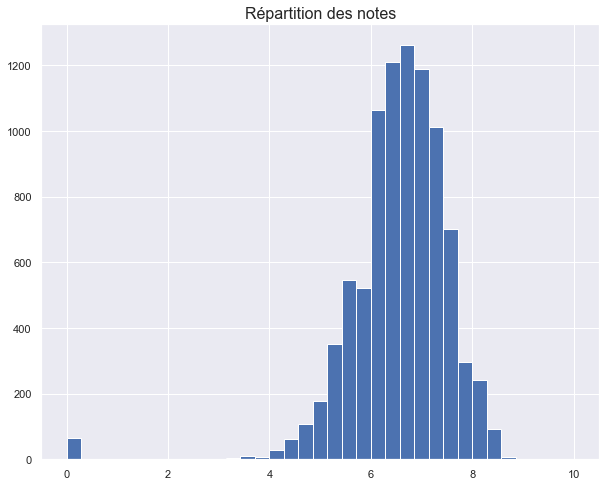

In [68]:
plt.figure(figsize=(10,8))

df['Note'].hist(bins=35)

plt.title("Répartition des notes", size=16)
plt.show()

### 4.2 Genre

In [69]:
#certains genres dans la colonne "Genre" sont stockés sous forme de chaînes de caractères plutôt que de listes

df['Genre'] = df['Genre'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [70]:
genres_expanded = df['Genre'].explode()

# Comptez le nombre d'occurrences de chaque genre
genre_counts = genres_expanded.value_counts()

# genre_counts est maintenant une Series avec l'index en tant que genres et les valeurs en tant que compte

# Si vous voulez transformer cela en un DataFrame
df_genre_counts = genre_counts.reset_index()
df_genre_counts.columns = ['Genre', 'Nombre de films']

df_genre_counts

,Genre,Nombre de films
0,Drame,3449
1,Comédie,2779
2,Action,2596
3,Thriller,2445
4,Aventure,1773
5,Horreur,1378
6,Romance,1346
7,Crime,1276
8,Fantastique,1245
9,Familial,1229


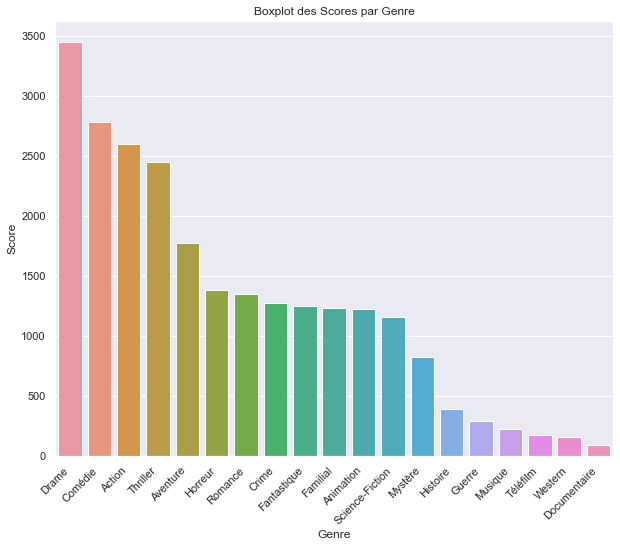

In [71]:
plt.figure(figsize=(10,8))

sns.barplot(x='Genre', y='Nombre de films', data=df_genre_counts)

plt.title('Boxplot des Scores par Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')

plt.show()

### 4.3 Date de sortie

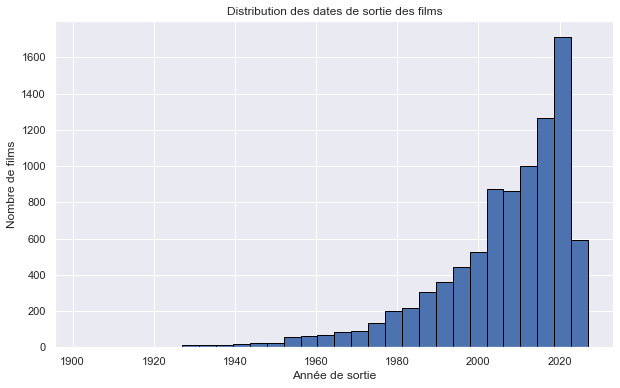

In [72]:
# Convertir la colonne "Date de sortie" en datetime
df['Date de sortie'] = pd.to_datetime(df['Date de sortie'])

# Créer un histogramme
plt.figure(figsize=(10,6))
df['Date de sortie'].dt.year.hist(bins=30, edgecolor='black')
plt.title('Distribution des dates de sortie des films')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.show()


### 4.4 Synopsis

In [73]:
df.Synopsis.apply(lambda i : len(i))

0       226
1       373
2       272
3       627
4       343
       ... 
9995    623
9996    361
9997    366
9998    513
9999    620
Name: Synopsis, Length: 8958, dtype: int64

<AxesSubplot:xlabel='Synopsis'>

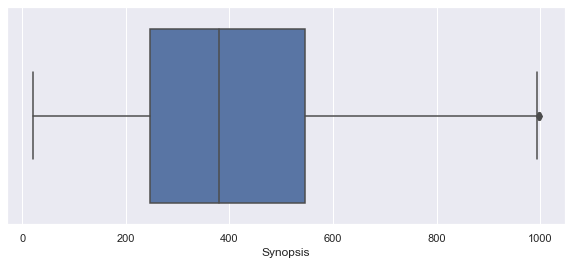

In [74]:
tmp = df.Synopsis.str.len()

plt.figure(figsize=(10,4))
sns.boxplot(tmp)

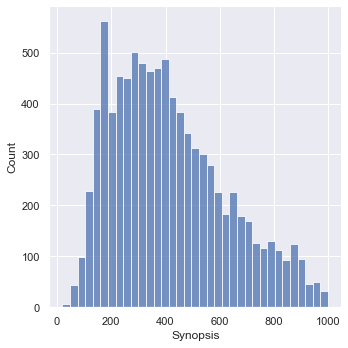

In [75]:
sns.displot(tmp)

In [76]:
df['len_txt'] = tmp
df.head(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt
0,507089,Five Nights at Freddy's,"[Horreur, Mystère]",2023-10-25,Un groupe d'animaux animatroniques interprète ...,8.4,226
1,951491,Saw X,"[Horreur, Thriller]",2023-09-26,"Dans l'espoir d'une guérison miraculeuse, John...",7.4,373
2,939335,Muzzle,"[Action, Crime, Drame, Thriller]",2023-09-29,"Jake Rosser, officier de police dans l'équipe ...",6.3,272
3,354912,Coco,"[Familial, Animation, Fantastique, Musique, Co...",2017-10-27,"Depuis déjà plusieurs générations, la musique ...",8.2,627
4,968051,La Nonne : La Malédiction de Sainte-Lucie,"[Horreur, Mystère, Thriller]",2023-09-06,"En France, en 1956, un prêtre est assassiné da...",7.0,343


In [77]:
df.sort_values("len_txt").head(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt
6241,917496,Beetlejuice 2,"[Comédie, Fantastique]",2024-09-05,Suite de Beetlejuice,0.0,20
4437,36362,Le Roi des rois,"[Drame, Fantastique]",1961-10-11,Péplum retraçant la vie de Jésus.,7.1,33
5591,83533,Avatar 3,"[Action, Science-Fiction, Aventure]",2025-12-17,Le troisième volet de la saga Avatar.,0.0,37
7135,347183,Haikyu !! - Film 1 - Un début et une fin,"[Animation, Comédie, Drame]",2015-07-03,Premier Haikyuu !! film récapitulatif. Ld,8.5,41
1047,575265,Mission : Impossible - Dead Reckoning Partie 2,"[Action, Aventure, Thriller]",2025-05-22,Suite des aventures de l'espion Ethan Hunt...,0.0,45
8554,44363,Frozen,[Thriller],2010-02-05,Trois skieurs sont bloqués sur un télésiège...,6.0,46
5651,876716,Ciao Alberto,"[Animation, Comédie, Familial, Fantastique]",2021-11-12,"Spin-off de Luca, des studios d’animation Pixar.",7.5,48
6112,336445,Army of One,[Comédie],2016-11-04,Un homme décide de traquer seul Oussama Ben La...,5.2,50
5729,52212,Miranda,"[Comédie, Romance]",1985-10-15,Miranda cherche un mari et essaye plusieurs ho...,5.2,51
8087,967847,S.O.S. Fantômes : L’Héritage 2,"[Fantastique, Aventure, Comédie]",2024-03-28,Suite des événements de S.O.S. Fantômes : L’Hé...,0.0,52


In [78]:
df.sort_values("len_txt").tail(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt
2945,1493,Miss Détective,"[Comédie, Crime, Action]",2000-12-22,L’agent Gracie Hart travaille dans un commando...,6.5,993
1619,44912,Green Lantern,"[Aventure, Action, Thriller, Science-Fiction]",2011-06-14,"Dans un univers aussi vaste que mystérieux, un...",5.2,993
4383,302401,Snowden,"[Drame, Histoire, Crime, Thriller]",2016-09-15,"Patriote idéaliste et enthousiaste, le jeune E...",7.1,993
5847,1683,Les Châtiments,[Horreur],2007-04-05,Katherine Winter a quitté l'habit de missionna...,5.7,993
8699,43258,La Loi du Seigneur,"[Drame, Histoire, Guerre, Familial, Comédie]",1956-11-25,La famille Birdwell vit dans l'Indiana en 1862...,6.6,994
7597,213681,Les Cerveaux,"[Action, Comédie, Crime]",2016-09-29,La vie de David Ghantt n’a rien de compliqué. ...,5.7,995
4702,9550,Le Secret des poignards volants,"[Aventure, Drame, Action]",2004-05-19,"En cette année 859, la Chine est ravagée par l...",7.3,998
8768,13384,Kes,[Drame],1970-04-03,Billy Casper vit dans une petite ville minière...,7.5,998
8360,6878,L'Incroyable Voyage,"[Aventure, Comédie, Familial]",1993-02-03,"Le film raconte les aventures de Shadow, un go...",6.9,998
4044,618344,Justice League Dark: Apokolips War,"[Animation, Action, Science-Fiction]",2020-05-05,"Suite à ses deux invasions ratées de la Terre,...",8.3,999


### 4.5 Multivariate analysis

In [79]:
corr = df.corr()

corr

,ID,Note,len_txt
ID,1.000000,-0.090136,-0.252926
Note,-0.090136,1.000000,0.094361
len_txt,-0.252926,0.094361,1.000000


<AxesSubplot:>

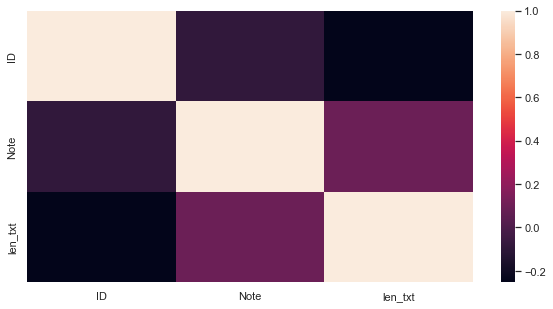

In [80]:
sns.heatmap(corr)

In [81]:
df.to_csv("df_movies_cleaned.csv", index=False)